# **GRIP TASK1** 

## **Prediction using Supervised ML**

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [75]:
ds=pd.read_csv('Student_Scores.csv')

In [76]:
ds

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


<Axes: xlabel='Hours', ylabel='Scores'>

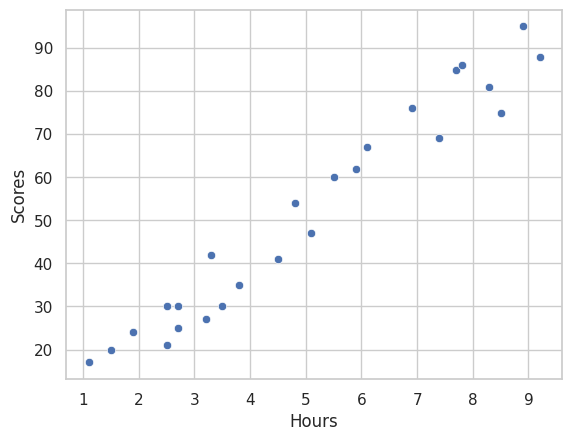

In [77]:
sns.set(style="whitegrid")
sns.scatterplot(x="Hours",y="Scores",data=ds)

In [78]:
X=np.array(ds['Hours']).reshape((25,1)).tolist()
y=np.array(ds['Scores']).reshape((25,1)).tolist()

In [79]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [80]:
reg =LinearRegression().fit(X_train,y_train)

In [81]:
line=reg.coef_*X+reg.intercept_
ds_new=pd.DataFrame(line,columns=['Scores'])
ds_new.index=ds['Hours']
ds_new.reset_index(inplace=True)

<Axes: xlabel='Hours', ylabel='Scores'>

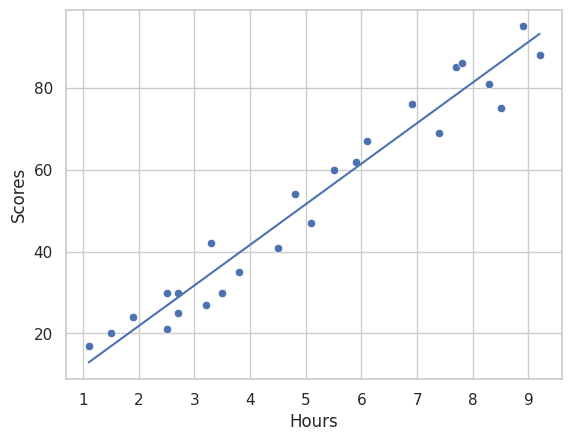

In [82]:
sns.scatterplot(x="Hours",y="Scores",data=ds)
sns.lineplot(x="Hours",y="Scores",data=ds_new)

In [87]:
y_pred=reg.predict(X_test).flatten().tolist()

In [88]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [91]:
hours = 9.25
own_pred = reg.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = [93.69173249]


In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 